## Q1.  Max heap

Implement a max heap instead of a min heap, by having the constructor explicitly pass the "comparison" operator in. Replace `min` and `del_min` by `dominant` and `del_dominant` methods. Change the classmethods to also take in the operator.

In [294]:
#your code here

class BinaryHeap:
    def __init__(self, cmp):
        # TODO why do we keep a None in front? 
        self.storage=[None]
        self.upto=0
        self.cmp = cmp

    @classmethod
    def heapify_slow(cls, it, cmp):
        inst = cls(cmp)
        for i in it:
            inst.insert(i)
        return inst

    # TODO Understand this
    @classmethod
    def heapify(cls, it, cmp):
        inst = cls(cmp)
        inst.storage = inst.storage + list(it)
        fromhalfway = (len(inst.storage) - 1) // 2
        inst.upto = len(inst.storage) - 1
        counter = 0
        while (fromhalfway > 0):
            # dotify(inst.storage, "onheapifyimg"+str(counter).zfill(2))
            counter += 1
            inst.sift_down(fromhalfway)
            fromhalfway -= 1
        # dotify(inst.storage, "onheapifyimg"+str(counter).zfill(2))
        return inst
    
    def insert(self, value):
        self.storage.append(value)
        self.upto += 1
        self.sift_up(self.upto)
        
    # This is a recursive call, implicitly looping
    def sift_up(self, i):
        parent = i // 2
        if (parent > 0) and self.cmp(self.storage[i], self.storage[parent]):
            self.storage[i], self.storage[parent] = self.storage[parent], self.storage[i]
            self.sift_up(parent)
     
    # change to dom_child
    def _dom_child(self, i):
        if 2*i + 1 > self.upto:
            return 2*i
        else:
            l = (self.storage[2*i], self.storage[2*i+1])
            if self.cmp == lt: 
                return 2*i + l.index(min(l))
            else: 
                return 2*i + l.index(max(l))
            
    # This is a recursive call, implicitly looping
    def sift_down(self, i):
        # dotify(self.storage, "delimg"+str(i).zfill(2))
        if 2*i <= self.upto:
            # change to dom_child
            child = self._dom_child(i)
            if self.cmp(self.storage[child], self.storage[i]):
                self.storage[child], self.storage[i] = self.storage[i], self.storage[child]
                self.sift_down(child)
        
    # change to dominant
    def dominant(self):
        return self.storage[1]
    
    # change to del_dominant
    def del_dominant(self):
        domval = self.storage[1]
        self.storage[1], self.storage[self.upto] = self.storage[self.upto], self.storage[1]
        self.storage.pop()
        self.upto -= 1
        self.sift_down(1)
        return domval

Lets use your code to find the minimum as well as the maximum of the old array. Run the code in the following cells and make sure you did it right...

In [295]:
data = [1,8,5,9,23,2,45,6,7,99,-5]

In [296]:
from operator import gt, lt

In [297]:
# do a min heap
bh = BinaryHeap.heapify(data, lt)
print(bh.storage)
bh.dominant()

[None, -5, 1, 2, 6, 8, 5, 45, 9, 7, 99, 23]


-5

In [298]:
# do a max heap

bh = BinaryHeap.heapify(data, gt)
print(bh.storage)
bh.dominant()

[None, 99, 23, 45, 9, 8, 2, 5, 6, 7, 1, -5]


99

## Q2. Heapsort

Heapsort is an algorithm that takes the idea of the selection sort algorithm and replces the inner loop by the use of a max-heap.

In [299]:
def selection_sort(A):
    for i in range(len(A)):
        print("<<<",A)
        min_index = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]
        print(">>>",A)

In [300]:
selection_sort(data)

<<< [1, 8, 5, 9, 23, 2, 45, 6, 7, 99, -5]
>>> [-5, 8, 5, 9, 23, 2, 45, 6, 7, 99, 1]
<<< [-5, 8, 5, 9, 23, 2, 45, 6, 7, 99, 1]
>>> [-5, 1, 5, 9, 23, 2, 45, 6, 7, 99, 8]
<<< [-5, 1, 5, 9, 23, 2, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 9, 23, 5, 45, 6, 7, 99, 8]
<<< [-5, 1, 2, 9, 23, 5, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 5, 23, 9, 45, 6, 7, 99, 8]
<<< [-5, 1, 2, 5, 23, 9, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 5, 6, 9, 45, 23, 7, 99, 8]
<<< [-5, 1, 2, 5, 6, 9, 45, 23, 7, 99, 8]
>>> [-5, 1, 2, 5, 6, 7, 45, 23, 9, 99, 8]
<<< [-5, 1, 2, 5, 6, 7, 45, 23, 9, 99, 8]
>>> [-5, 1, 2, 5, 6, 7, 8, 23, 9, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 23, 9, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]


The basic idea is this. First heapify the entire array. The max should then be the 1st element (save our placeholder None) of the heap's storage. Swap this max with the last element to store the maximum at the end. Now you've put in some new wierd value at the top of the heap and have lost the heap property. You have an additional element at the end.

In-place in the array, without making any additional allocations, consider all but the last element to be the new "heap". What method in the heap class must we use to restore the heap property?

Use this method to sort the array. Print the before and after for each iteration of the outer loop as above. What is the $O(n)$ for this method?

In [301]:
#your code here

# do a max heap
def heap_sort(data): 
    bh = BinaryHeap.heapify(data, gt)
#     length = len(bh.storage)
    # reversed(range(1, len(bh.storage)))
#     range(length-1, 0, -1)
    for i in reversed(range(1, len(bh.storage))):    
        print(i)
        print('FIRST <<<', bh.storage)    

        bh.storage[1], bh.storage[i] = bh.storage[i], bh.storage[1]

        print('SWAP >>>', bh.storage)
        bh.upto -= 1
        bh.sift_down(1)

        print('SIFT >>>', bh.storage)    
    
    print(bh.storage)

In [302]:
list(range(len(bh.storage)-1, 0, -1))

[11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [303]:
list(reversed(range(1, len(bh.storage))))

[11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [304]:
heap_sort(data)
# [None, 99, 23, 45, 9, 8, 2, 5, 6, 7, 1, -5]

11
FIRST <<< [None, 99, 45, 8, 23, 6, 7, 2, 9, 5, 1, -5]
SWAP >>> [None, -5, 45, 8, 23, 6, 7, 2, 9, 5, 1, 99]
SIFT >>> [None, 45, 23, 8, 9, 6, 7, 2, -5, 5, 1, 99]
10
FIRST <<< [None, 45, 23, 8, 9, 6, 7, 2, -5, 5, 1, 99]
SWAP >>> [None, 1, 23, 8, 9, 6, 7, 2, -5, 5, 45, 99]
SIFT >>> [None, 23, 9, 8, 5, 6, 7, 2, -5, 1, 45, 99]
9
FIRST <<< [None, 23, 9, 8, 5, 6, 7, 2, -5, 1, 45, 99]
SWAP >>> [None, 1, 9, 8, 5, 6, 7, 2, -5, 23, 45, 99]
SIFT >>> [None, 9, 6, 8, 5, 1, 7, 2, -5, 23, 45, 99]
8
FIRST <<< [None, 9, 6, 8, 5, 1, 7, 2, -5, 23, 45, 99]
SWAP >>> [None, -5, 6, 8, 5, 1, 7, 2, 9, 23, 45, 99]
SIFT >>> [None, 8, 6, 7, 5, 1, -5, 2, 9, 23, 45, 99]
7
FIRST <<< [None, 8, 6, 7, 5, 1, -5, 2, 9, 23, 45, 99]
SWAP >>> [None, 2, 6, 7, 5, 1, -5, 8, 9, 23, 45, 99]
SIFT >>> [None, 7, 6, 2, 5, 1, -5, 8, 9, 23, 45, 99]
6
FIRST <<< [None, 7, 6, 2, 5, 1, -5, 8, 9, 23, 45, 99]
SWAP >>> [None, -5, 6, 2, 5, 1, 7, 8, 9, 23, 45, 99]
SIFT >>> [None, 6, 5, 2, -5, 1, 7, 8, 9, 23, 45, 99]
5
FIRST <<< [None, 6, 5, 2

*your answer here*

This is an $O(n \log n)$ algorithm because each of the n elements takes $\log n$ time to reheapify. 


## Q3. Median maintenance

Median maintenance is a very cool algorithm to find an online median. 

We create two arrays to test our implementation, using `np.median` to compute our answer...

In [363]:
import random
import numpy as np

In [364]:
l = [random.randint(1,1000) for _ in range(150)]
print(len(l), np.median(l))
l2 = l + [random.randint(1,1000)]
print(len(l2), np.median(l2))

150 460.0
151 459.0


In [365]:
l

[86,
 656,
 794,
 83,
 27,
 611,
 241,
 537,
 96,
 49,
 947,
 522,
 407,
 138,
 412,
 919,
 812,
 272,
 734,
 178,
 855,
 177,
 459,
 833,
 688,
 450,
 775,
 134,
 654,
 442,
 558,
 122,
 44,
 526,
 424,
 6,
 252,
 71,
 124,
 274,
 279,
 810,
 914,
 907,
 345,
 275,
 667,
 202,
 867,
 35,
 964,
 658,
 972,
 461,
 265,
 724,
 739,
 225,
 723,
 435,
 588,
 206,
 234,
 189,
 28,
 883,
 62,
 696,
 232,
 924,
 707,
 95,
 719,
 93,
 187,
 296,
 563,
 657,
 720,
 471,
 95,
 524,
 689,
 116,
 396,
 469,
 353,
 945,
 268,
 990,
 478,
 53,
 630,
 525,
 213,
 118,
 742,
 350,
 931,
 995,
 889,
 304,
 376,
 518,
 506,
 238,
 72,
 943,
 253,
 953,
 794,
 666,
 147,
 485,
 637,
 189,
 512,
 235,
 637,
 994,
 632,
 1000,
 893,
 652,
 450,
 506,
 927,
 49,
 109,
 906,
 26,
 202,
 704,
 428,
 334,
 878,
 201,
 772,
 960,
 753,
 414,
 856,
 317,
 861,
 361,
 408,
 168,
 129,
 113,
 217]

You will implement `def online_median(iterator)` which is a generaor yielding successive values of your online median. 

The algorithm is as follows:

We'll use 2 heaps, a max heap for the lower half of the data, and a min-heap for the upper half. We take the first 2values in our data and assign the smaller value to the max heap, while the larger value goes to the min-heap. Then, as we "insert" subsequent values in one of the two heaps, the following holds: if we keep the number of elements in both heaps equal (for the even case) or at-most differing by one, the median is respectively the average of the two dominants or the dominant in the heap with one xtra item.

What then is our strategy for this balanced insertion? Quite simple really: if a new value is not as dominant as the dominant value, add it to that heap. If it is more dominant, add it to the other. If two items in a row get added to the same heap, the heaps will be out of balance by more than one. In this case, take the dominant element from the larger heap and simply add it to the smaller one.

In [366]:
#your code here

"""
Split up and create a min and max heap 
Put higher number in min heap 
put smaller number in max heap
"""
import numpy as np

def online_median(iterator): 
    maxheap = BinaryHeap(gt)
    minheap = BinaryHeap(lt)
    
    counter = 0
    
    for item in iterator: 
        counter += 1
        
        # handle first number
        if counter == 1: 
            prev = item
            yield item
        
        # handle first two numbers
        elif counter == 2: 
            if prev > item: 
                maxheap.insert(item)
                minheap.insert(prev)
            else: 
                maxheap.insert(prev)
                minheap.insert(item)
            
#             print(maxheap.storage)
#             print(minheap.storage)
            yield np.mean([item, prev])
        
        else:
            # insert new items
            if item < maxheap.dominant():
                maxheap.insert(item)
            else: 
                minheap.insert(item)

            # rebalance if necessary 
            if np.absolute(len(maxheap.storage) - len(minheap.storage)) > 1: 
                if len(maxheap.storage) > len(minheap.storage):
                    dom = maxheap.dominant()
                    maxheap.del_dominant()
                    minheap.insert(dom)
                elif len(maxheap.storage) < len(minheap.storage):  
                    dom = minheap.dominant()
                    minheap.del_dominant()
                    maxheap.insert(dom)

            # yield latest median
            if len(maxheap.storage) == len(minheap.storage):
                yield np.mean([maxheap.dominant(), minheap.dominant()])
            elif len(maxheap.storage) < len(minheap.storage):
                yield minheap.dominant()
            else: 
                yield maxheap.dominant()

In [375]:
list(online_median([1, 3, 2, 6, 20, 24, 30, 30, 30]))

[1, 2.0, 2, 2.5, 3, 4.5, 6, 13.0, 20]

Do your answers match?

460.0


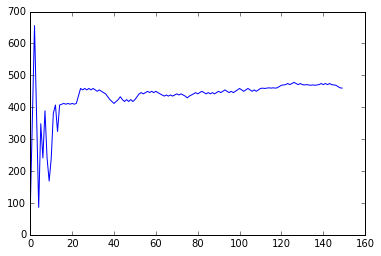

In [368]:
%matplotlib inline
import matplotlib.pyplot as plt
medians = list(online_median(iter(l)))
print(medians[-1])
plt.plot(medians)

In [369]:
list(online_median(iter(l2)))[-1]

459

What is the $O(n)$ behavior of this median maintenance algorithm?

*your answer here*

Overall, the behavior is $O(n \log n)$. It takes $O(\log n)$ time to insert each element into the heap and in the cases where it is necessary to rebalance, it takes $O(\log n)$ to delete & re-heapify and $O(\log n)$ to insert into the other heap. Therefore, the worst case is a constant factor of $O(\log n)$ per element, making the overall complexity $O(n \log n)$.


Lastly, lets repeat the analysis we did last time on the randomly generated data.

In [370]:
from random import normalvariate, random
from itertools import count
def make_data(m, stop=None):
    for _ in count():
        if stop and _ > stop:
            break
        yield 1.0e09 + normalvariate(0, m*random() )

In [371]:
g = online_median(make_data(5, 100))
print(type(g))
out = list(g)
out[-10:]

<class 'generator'>


[1000000000.0348933,
 1000000000.0263566,
 1000000000.0229273,
 1000000000.0194979,
 1000000000.0229273,
 1000000000.0263566,
 1000000000.0229273,
 1000000000.0263566,
 1000000000.0271921,
 1000000000.0280277]

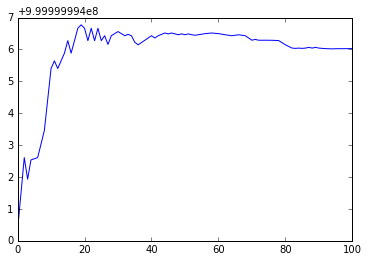

In [372]:
plt.plot(out)